<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Artificial Intelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## Unsupervised Learning

In [2]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [5]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=1.25)

In [6]:
model = KMeans(n_clusters=4, random_state=0)

In [7]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [8]:
y_ = model.predict(x)

In [9]:
y_

array([1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1,
       0, 3, 0, 0, 2, 2, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 3, 3, 0, 2, 2,
       1, 0, 3, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 3, 2, 1, 0, 2, 1, 3, 1, 2,
       0, 0, 0, 3, 1, 0, 3, 2, 3, 1, 3, 2, 3, 3, 0, 1, 0, 1, 3, 3, 1, 3,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2], dtype=int32)

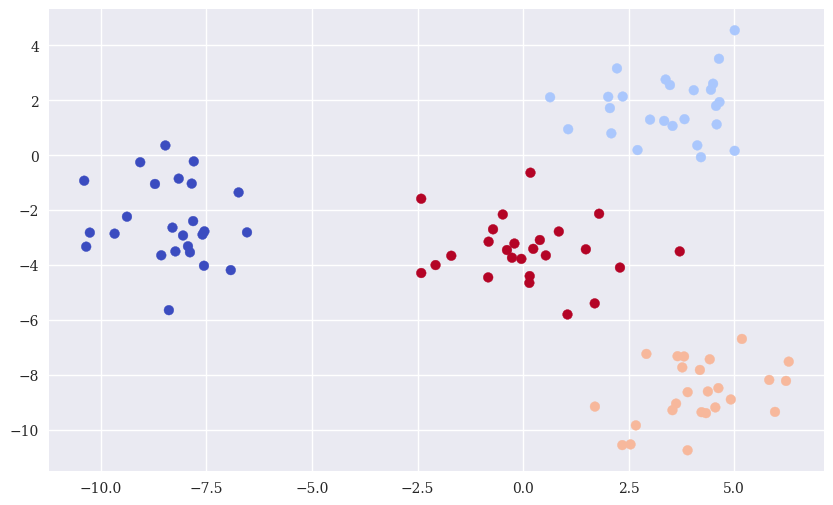

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

## Reinforcement Learning

In [11]:
ssp = [1, 1, 1, 1, 0]

In [12]:
asp = [1, 0]

In [13]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [14]:
rl = np.array([epoch() for _ in range(15)])
rl

array([47, 56, 47, 50, 51, 56, 45, 51, 49, 47, 47, 54, 53, 56, 51])

In [15]:
rl.mean()

50.666666666666664

In [16]:
ssp = [1, 1, 1, 1, 0]

In [17]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [18]:
rl = np.array([epoch() for _ in range(15)])
rl

array([56, 72, 65, 64, 61, 63, 68, 71, 68, 61, 67, 68, 69, 66, 54])

In [19]:
rl.mean()

64.86666666666666

## Supervised Learning

### OLS Regression

In [20]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [21]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [22]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

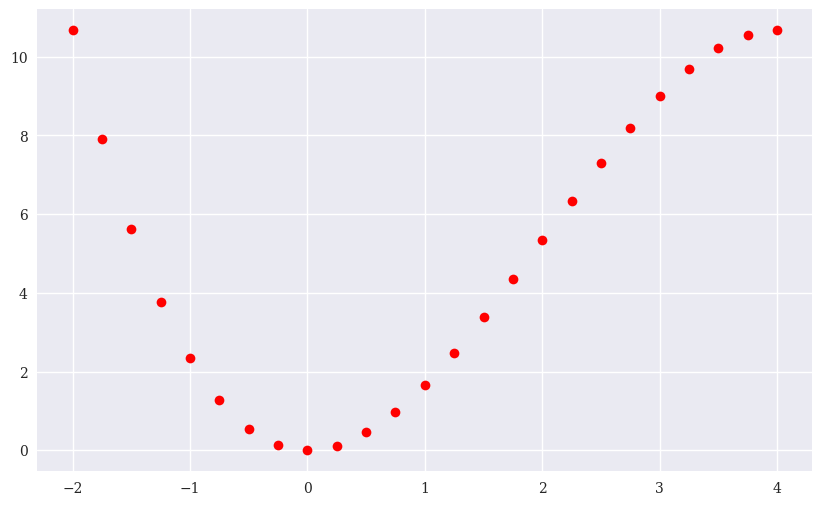

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

In [24]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [25]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [26]:
y_ = alpha + beta * x

In [27]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

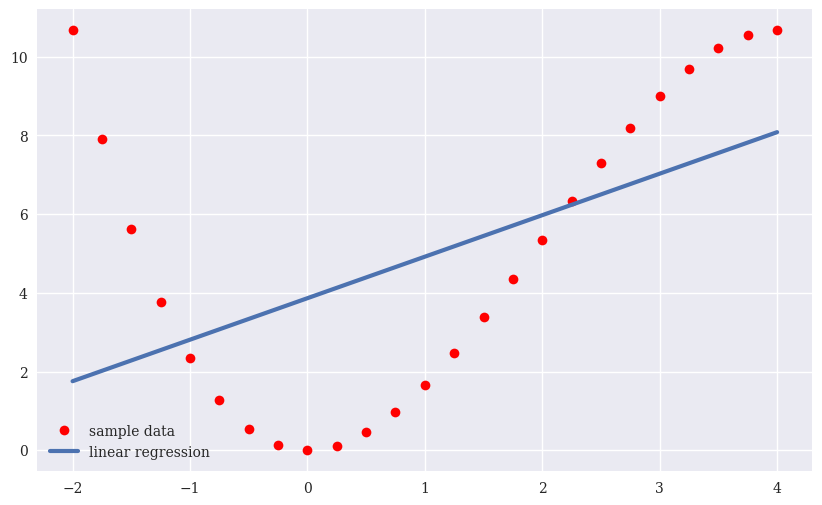

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


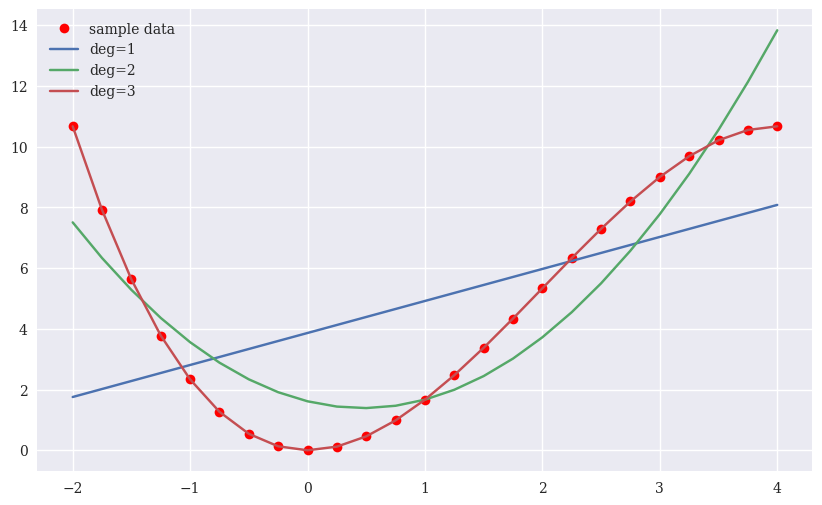

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [30]:
reg

array([-0.3333,  2.    ,  0.    , -0.    ])

## Neural Network &mdash; `sklearn`

In [31]:
from sklearn.neural_network import MLPRegressor

In [32]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

In [33]:
model.fit(x.reshape(-1, 1), y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [34]:
y_ = model.predict(x.reshape(-1, 1))

In [35]:
MSE = ((y - y_) ** 2).mean()
MSE

0.005318261991055748

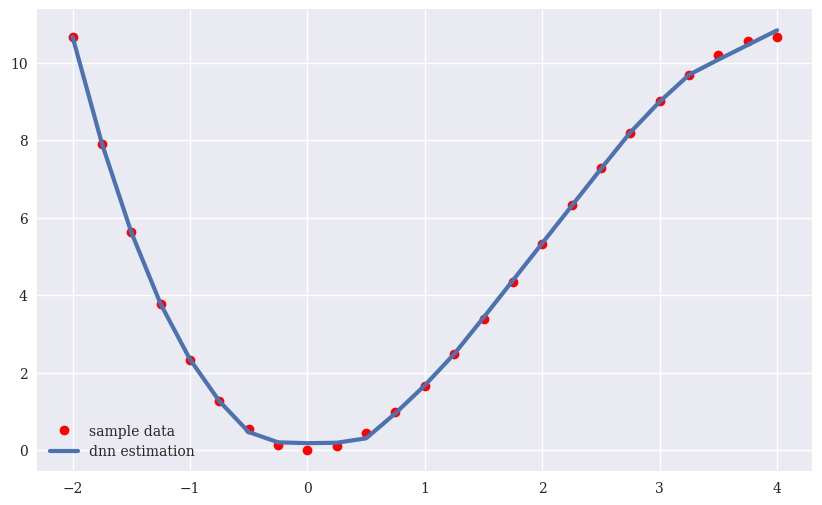

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

### Neural Network &mdash; `Keras`

In [39]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [40]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

In [41]:
from keras.layers import Dense
from keras.models import Sequential

In [42]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1)) # <2>
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [43]:
((y - y_) ** 2).mean()

0.005318261991055748

1/1 [==============================] - 0s 42ms/step
round=1 | MSE=2.73325
1/1 [==============================] - 0s 14ms/step
round=2 | MSE=0.71149
1/1 [==============================] - 0s 13ms/step
round=3 | MSE=0.22987
1/1 [==============================] - 0s 13ms/step
round=4 | MSE=0.11595
1/1 [==============================] - 0s 13ms/step
round=5 | MSE=0.08441


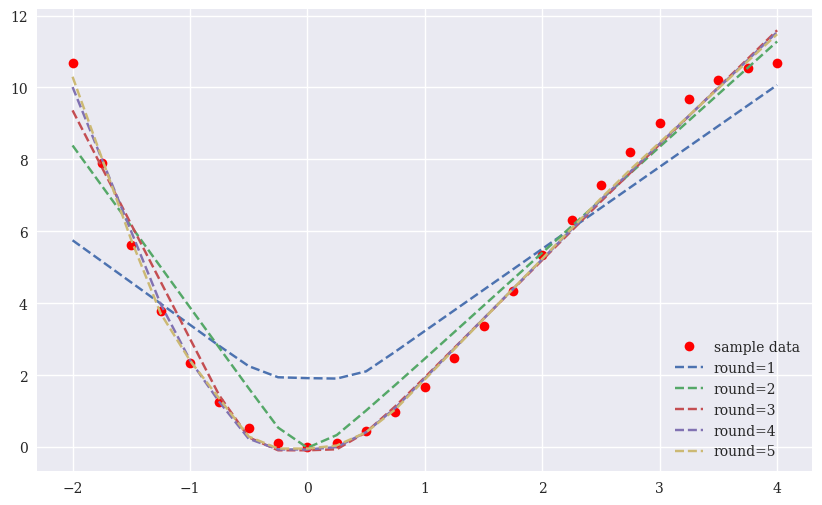

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Universal Approximation

In [45]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


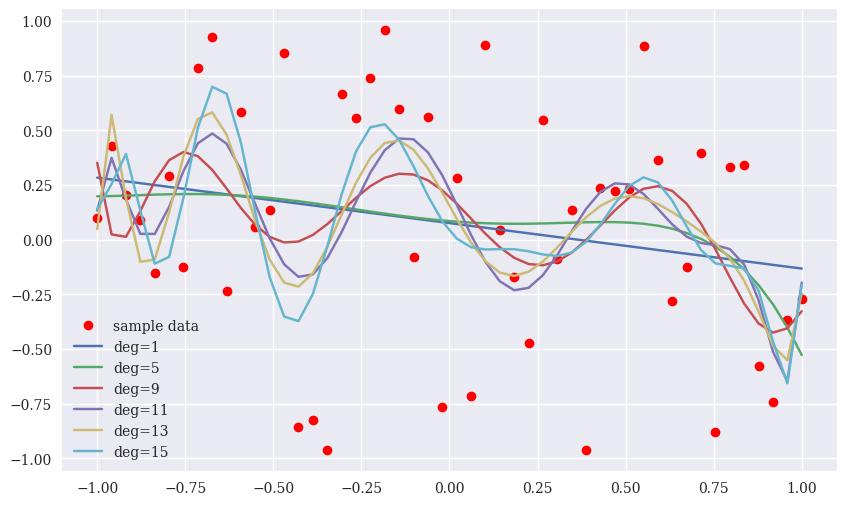

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [47]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


2/2 [==============================] - 0s 2ms/step
round=1 | MSE=0.14982
2/2 [==============================] - 0s 1ms/step
round=2 | MSE=0.11619
2/2 [==============================] - 0s 1ms/step
round=3 | MSE=0.09168
2/2 [==============================] - 0s 1ms/step
round=4 | MSE=0.05532
2/2 [==============================] - 0s 1ms/step
round=5 | MSE=0.03702
2/2 [==============================] - 0s 1ms/step
round=6 | MSE=0.03061
2/2 [==============================] - 0s 1ms/step
round=7 | MSE=0.03153
CPU times: user 21.4 s, sys: 2.84 s, total: 24.2 s
Wall time: 9.83 s


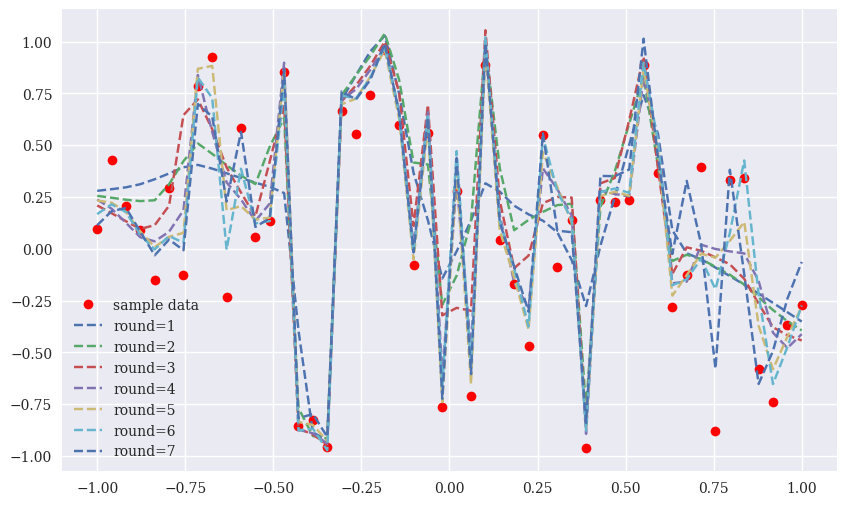

In [49]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Importance of Big Data

In [50]:
f = 5
n = 10

In [51]:
np.random.seed(100)

In [52]:
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [53]:
y = np.random.randint(0, 2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [54]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [55]:
hist = model.fit(x, y, epochs=50, verbose=False)

In [56]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

1/1 [==============================] - 0s 29ms/step


array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [57]:
y == y_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

In [58]:
res = pd.DataFrame(hist.history)

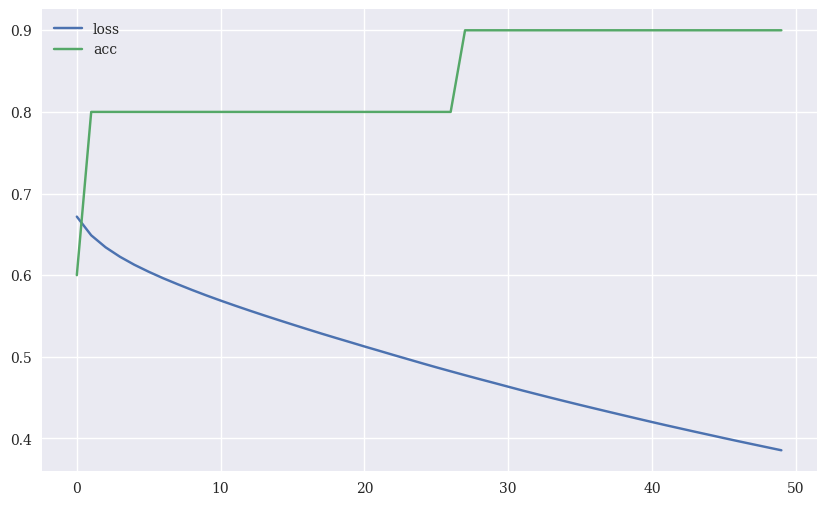

In [59]:
res.plot(figsize=(10, 6));

In [60]:
f = 10
n = 250

In [61]:
np.random.seed(100)

In [62]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [63]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [64]:
2 ** f

1024

In [65]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [66]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int64
 1   f1      250 non-null    int64
 2   f2      250 non-null    int64
 3   f3      250 non-null    int64
 4   f4      250 non-null    int64
 5   f5      250 non-null    int64
 6   f6      250 non-null    int64
 7   f7      250 non-null    int64
 8   f8      250 non-null    int64
 9   f9      250 non-null    int64
 10  l       250 non-null    int64
dtypes: int64(11)
memory usage: 21.6 KB


In [68]:
grouped = data.groupby(list(data.columns))

In [69]:
freq = grouped['l'].size().unstack(fill_value=0)

In [70]:
freq['sum'] = freq[0] + freq[1]

In [71]:
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [72]:
freq['sum'].describe().astype(int)

count    227
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        2
Name: sum, dtype: int64

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [74]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000, random_state=100)

In [75]:
model.fit(data[fcols], data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [76]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

In [77]:
split = int(len(data) * 0.7)

In [78]:
train = data[:split]
test = data[split:]

In [79]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [80]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [81]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.38666666666666666

In [82]:
factor = 50

In [83]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                   columns=fcols)

In [84]:
big['l'] = np.random.randint(0, 2, factor * n)

In [85]:
train = big[:split]
test = big[split:]

In [86]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [87]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [88]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.5043407707910751

In [89]:
grouped = big.groupby(list(data.columns))

In [90]:
freq = grouped['l'].size().unstack(fill_value=0)

In [91]:
freq['sum'] = freq[0] + freq[1]

In [92]:
freq.head(6)

l                               0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9            
0  0  0  0  0  0  0  0  0  0   10  9   19
                           1    5  4    9
                        1  0    2  5    7
                           1    6  6   12
                     1  0  0    9  8   17
                           1    7  4   11

In [93]:
freq['sum'].describe().astype(int)

count    1024
mean       12
std         3
min         2
25%        10
50%        12
75%        15
max        26
Name: sum, dtype: int64

In [94]:
8 ** 25

37778931862957161709568

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>